# Part II - (Ford GoBike System Data Analysis)
## by (Passy Mukami Miano)



## Investigation Overview

> In this analysis I want to share insights that could help us understand bike usage among users. My presentation will be focused on trends of bike usage during different hours of the day and during different weekdays among different users.
 

## Dataset Overview

> The dataset contains information about 183,412 individual rides made in the Ford GoBike bike-sharing system covering the greater San Fransisco Bay area. The dataset has several features which include: duration in seconds, start_time, end_time, user_type, member_birth_year, member_gender, start_station_name, end_station_name and other bike trip information. 

In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [19]:
# load in the dataset into a pandas dataframeb
bike_trips = pd.read_csv("201902-fordgobike-tripdata.csv")
bike_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [20]:
# convert user_type and member_gender into categorical variables.
nominal_var_dict = {'user_type': ['Subscriber','Customer'],
                    'member_gender': ['Male', 'Female', 'Other'],
                   'bike_share_for_all_trip': ['No', 'Yes']}
                
for var in nominal_var_dict:
    unordered_var = pd.api.types.CategoricalDtype(ordered = False,
                                                categories = nominal_var_dict[var])
    bike_trips[var] = bike_trips[var].astype(unordered_var)
bike_trips.dtypes  

duration_sec                  int64
start_time                   object
end_time                     object
start_station_id            float64
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                       int64
user_type                  category
member_birth_year           float64
member_gender              category
bike_share_for_all_trip    category
dtype: object

In [21]:
# Changing the format to datetime
bike_trips['start_time'] = pd.to_datetime(bike_trips['start_time'])
bike_trips['end_time'] = pd.to_datetime(bike_trips['end_time'])
bike_trips.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

In [22]:
#extracting day and hour from startdate column
bike_trips['start_time_weekday'] = bike_trips['start_time'].dt.strftime('%A')
bike_trips['start_time_hour'] = bike_trips['start_time'].dt.hour
bike_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23


In [23]:
#It is import to know the age of the users in order to
#get insights on the target audience.
bike_trips['age'] = 2019 - bike_trips['member_birth_year']
bike_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,45.0


In [24]:
#converting duration from seconds to minutes
bike_trips['duration_min'] = round(bike_trips['duration_sec']/60, 2)
bike_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,35.0,869.75
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18,NaN,708.68
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,47.0,1030.90
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,30.0,608.17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,45.0,26.42


## Distribution of Bike Ride Duration in Minutes
Trip duration takes a long range of values so we converted to a log scale. The didtribution is unimodal and fairy symmetric with a top peak between 8 and 10 minutes. Most of the bike rides are also less than 30 minutes.

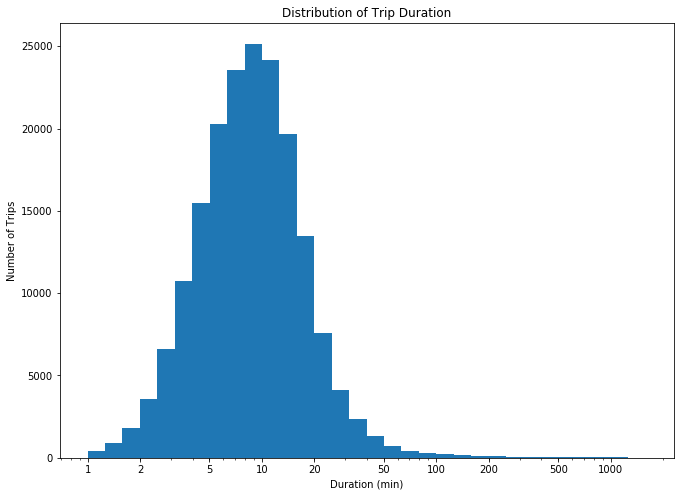

In [25]:
#there is a long tail in the distribution, so let's put it on a log scale instead

# Get the ticks for bins between [0 - maximum duration]
bins1 = 10 ** np.arange(0, np.log10(bike_trips['duration_min'].max()) + 0.1, 0.1)

ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

#plot the histogram
plt.figure(figsize=[11, 8])
plt.hist(data = bike_trips, x = 'duration_min', bins = bins1);
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Duration')

#applying a log scale to the x-axis
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

## Distribution of Bikes Rides at Hours of the Day

A bimodal distribution can be observed with two peaks at 8am and 5pm. This may because they are commute hours and hence the busiest time of the day. We can also observe that the least number of rides are made between 1am and 4am which is when most people are asleep.

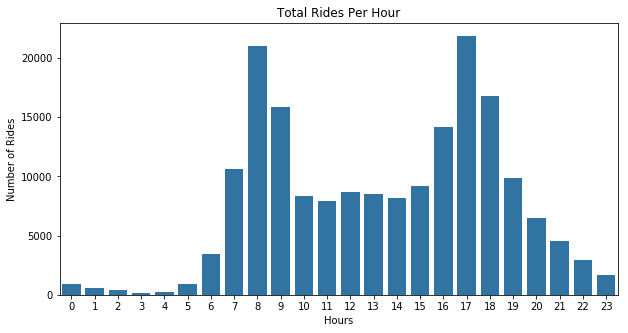

In [26]:
hours = np.arange(0, 24, 1)

base_color = sb.color_palette()[0]
plt.figure(figsize = (10,5))
#use a countplot because hours are discrete
sb.countplot(data = bike_trips, x = 'start_time_hour', order = hours, color = base_color);
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.title('Total Rides Per Hour');


## (Visualization 3)

Subscribers use the bike sharing system more than customers along the week. Customers have a relatively consistent bike trips along the week while we can observe a big decrease in bike trips during the weekend for subscribers.

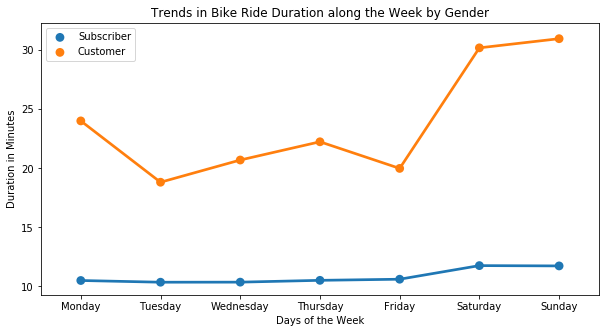

In [27]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = (10,5))
sb.pointplot(data = bike_trips, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type', ci=None, order = days)
plt.legend()
plt.xlabel('Days of the Week')
plt.ylabel('Duration in Minutes')
plt.title('Trends in Bike Ride Duration along the Week by Gender');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 337344 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 